In [1]:
import sys
sys.path.append("../pre-processing")
sys.path.append("../pre-processing/methods")
from prepare_data import prepare_data
import numpy as np
import matplotlib.pyplot as plt

# Load the X

In [123]:
rawData = prepare_data("/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Fast-Richard-Trial-1.txt")[3]

# Generate the labels

In [4]:
import math
#creating the labels
labels = np.zeros((len(rawData), 1))
label_helper_1 = np.array([1.42, .4, .96, .7, 1.02, 1.17, 1.3, 1.08, 1.11, 1.22, 1.16, .94, 1.06, 1.16, 1.25, 1.10, 1.13, 1.19, 1.06, 1.16, 1.03, 1.02, 1.00, 1.16, 1.05, .89, .97, .65])
for i in range(1, len(label_helper)):
    label_helper[i] =  int(np.sum(label_helper_1[0:i]) * 200) 
zipped_helper = []
for i in range(len(label_helper) - 1):
    zipped_helper.append((int(label_helper[i]), int(label_helper[i + 1])))
zipped_helper = np.array(zipped_helper)
labels = np.array(labels)
for i in range(1, len(zipped_helper), 3):
    start = zipped_helper[i][0]
    stop = zipped_helper[i][1]
    labels[start: stop] = 1
for i in range(2, len(zipped_helper), 3):
    labels[zipped_helper[i][0]: zipped_helper[i][1]] = 1

NameError: name 'label_helper' is not defined

# Only grab the not horrible parts of the data

In [161]:
labels = labels[100:5000]
rawData = rawData[100:5000]
net_data = [rawData, labels]
print labels.shape
print rawData.shape

(4900, 1)
(4900, 100)


# Pickle Dump It

In [162]:
import pickle
pickle.dump(net_data, open('/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Fast-Richard-Trial-1.DatLabl', 'wb'))

# Make Sure It Worked

In [124]:
import pickle
new_data = pickle.load(open('/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Fast-Richard-Trial-1.DatLabl', 'r'))

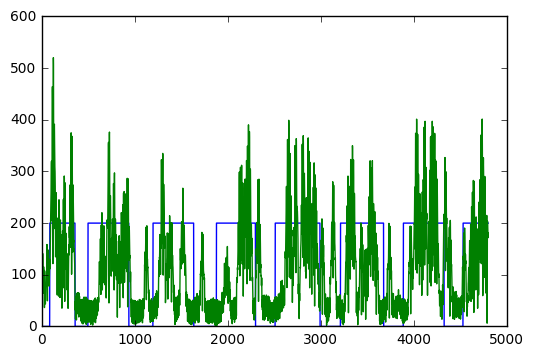

In [127]:
plt.plot(labels * 200)
plt.plot([np.std(rawData[i]) for i in range(len(rawData))])
plt.show()

In [125]:
rawData = rawData[100:4900]
labels = new_data[1][100:4900]

In [126]:
print rawData.shape
print labels.shape

(4800, 36)
(4800, 1)


In [132]:
net_data = [rawData, labels]
pickle.dump(net_data, open('/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Fast-Richard-Trial-1.DatLabl', 'wb'))

In [133]:
new_data = pickle.load(open('/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Fast-Richard-Trial-1.DatLabl', 'r'))

In [135]:
new_data[0].shape

(4800, 36)

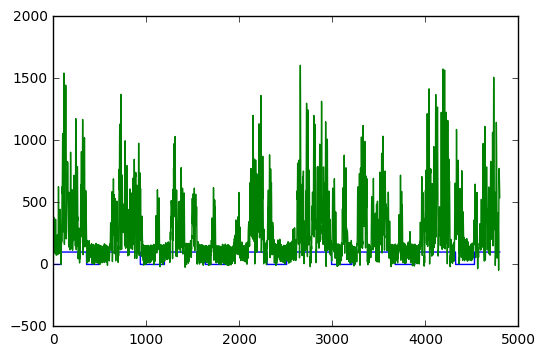

In [138]:
plt.plot(new_data[1] * 100)
plt.plot([np.max(new_data[0][i]) for i in range(len(new_data[0]))])
plt.show()

# Concatenation

(16811,)
(4900,)


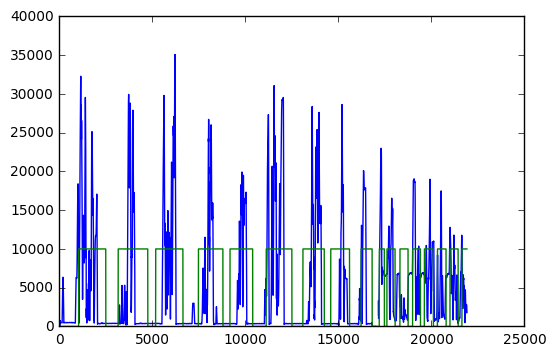

In [33]:
import pickle
data_1 = pickle.load(open('/Users/williamlevine/Downloads/OpenBCI-RAW-Mixture-Trial-4.DatLabl', 'r'))
labels_1 = data_1[1]
x_1 = data_1[0]
data_2 = pickle.load(open('/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Fast-Richard-Trial-1.DatLabl', 'r'))
labels_2 = np.array(data_2[1])[:, 0]
x_2 = data_2[0]
new_x = np.concatenate((x_1, [[0] * 36 for _ in range(200)], x_2))
new_labels = np.concatenate((labels_1, [0] * 200, labels_2))
new_net_data = [new_x, new_labels]
pickle.dump(new_net_data, open('/Users/williamlevine/Downloads/Mixture-Trial-4-And-Fast-Richard-Trial-1.DatLabl', 'wb'))

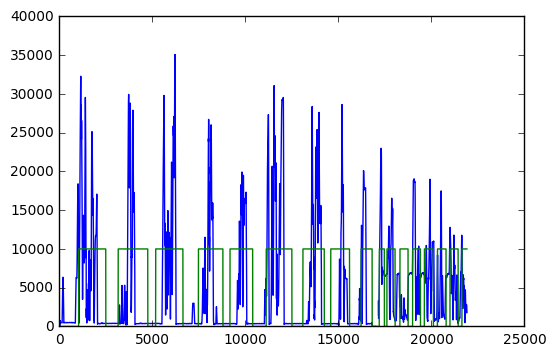

In [32]:
new_data = pickle.load(open('/Users/williamlevine/Downloads/Mixture-Trial-4-And-Fast-Richard-Trial-1.DatLabl', 'r'))
plt.plot([np.std(new_data[0][i]) for i in range(len(new_data[0]))])
plt.plot(new_data[1] * 10000)
plt.show()